1. IMPORTS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

CONFIGURAÇÕES VISUAIS:

In [2]:
plt.rcParams["figure.figsize"] = (8, 5)
sns.set(style="whitegrid")

print("="*70)
print("ANÁLISE DE EFICIÊNCIA ENERGÉTICA DE EDIFÍCIOS")
print("Future Skills Lab - Google Colab")
print("="*70)

ANÁLISE DE EFICIÊNCIA ENERGÉTICA DE EDIFÍCIOS
Future Skills Lab - Google Colab


In [3]:
file_name = "energy_efficiency_data.csv"

df = pd.read_csv(file_name)
print("✓ Dados carregados com sucesso!")
print(f"Linhas: {df.shape[0]} | Colunas: {df.shape[1]}")

print("\nNome das colunas originais:")
print(df.columns.tolist())

✓ Dados carregados com sucesso!
Linhas: 768 | Colunas: 10

Nome das colunas originais:
['Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area', 'Overall_Height', 'Orientation', 'Glazing_Area', 'Glazing_Area_Distribution', 'Heating_Load', 'Cooling_Load']


2. RENOMEAR COLUNAS (opcional, só para ficar mais legível)

O dataset original costuma usar X1..X8, Y1, Y2.
Vamos renomear se esses nomes existirem.

In [4]:
rename_dict = {
    'X1': 'compacidade_relativa',
    'X2': 'area_superficie',
    'X3': 'area_paredes',
    'X4': 'area_telhado',
    'X5': 'altura_total',
    'X6': 'orientacao',
    'X7': 'area_vidros',
    'X8': 'dist_area_vidros',
    'Y1': 'carga_aquecimento',
    'Y2': 'carga_resfriamento'
}

df = df.rename(columns={old: new for old, new in rename_dict.items() if old in df.columns})

print("\nColunas após renomear (se possível):")
print(df.columns.tolist())


Colunas após renomear (se possível):
['Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area', 'Overall_Height', 'Orientation', 'Glazing_Area', 'Glazing_Area_Distribution', 'Heating_Load', 'Cooling_Load']


3. ANÁLISE EXPLORATÓRIA BÁSICA

In [5]:
print("Análise exploratória básica")
print("\nInformações gerais:")
print(df.info())

print("\nEstatísticas descritivas:")
print(df.describe().T)

# Verificar valores ausentes
print("\nValores ausentes por coluna:")
print(df.isna().sum())

Análise exploratória básica

Informações gerais:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative_Compactness       768 non-null    float64
 1   Surface_Area               768 non-null    float64
 2   Wall_Area                  768 non-null    float64
 3   Roof_Area                  768 non-null    float64
 4   Overall_Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing_Area               768 non-null    float64
 7   Glazing_Area_Distribution  768 non-null    int64  
 8   Heating_Load               768 non-null    float64
 9   Cooling_Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB
None

Estatísticas descritivas:
                           count        mean        std     min       25%  \
Relative_Compa

4. DISTRIBUIÇÃO DAS VARIÁVEIS-ALVO (e outras numéricas)

Plotando distribuições das variáveis numéricas:


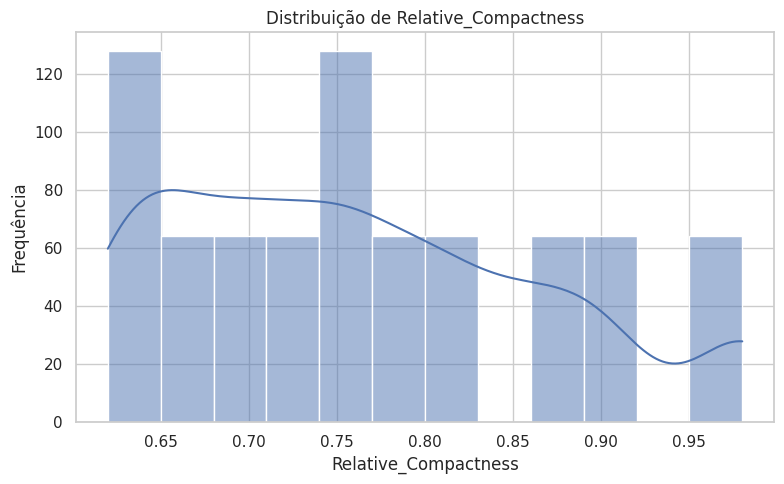

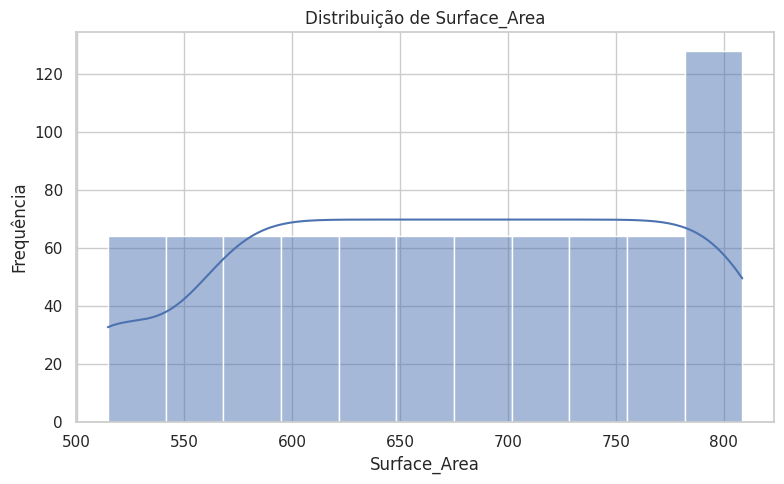

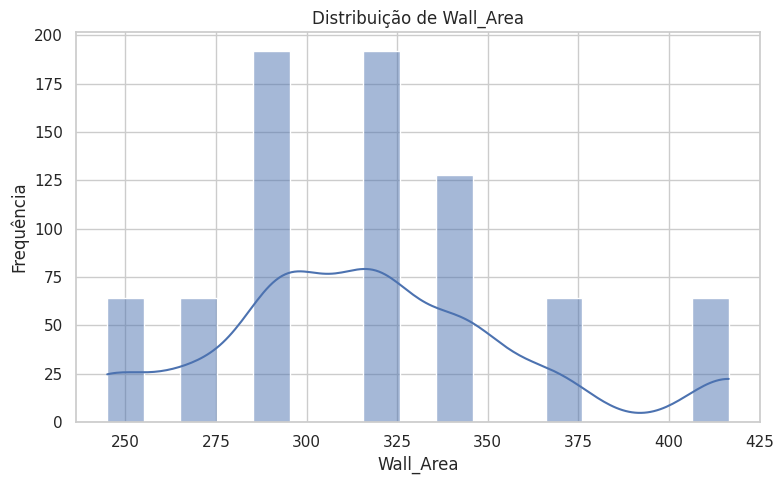

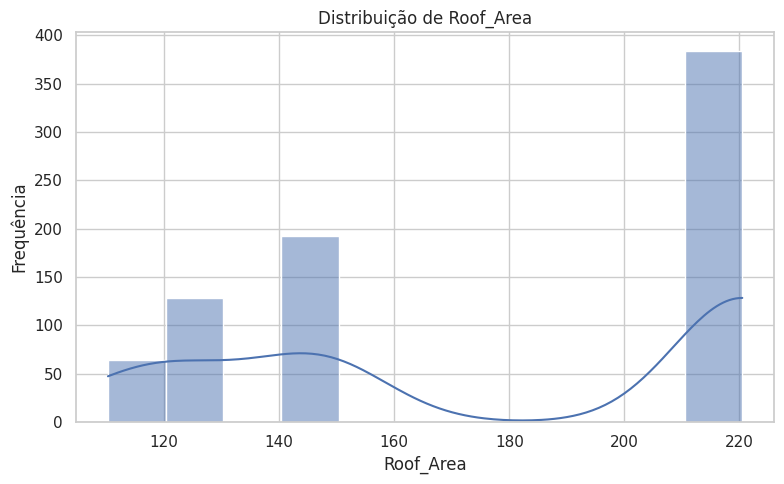

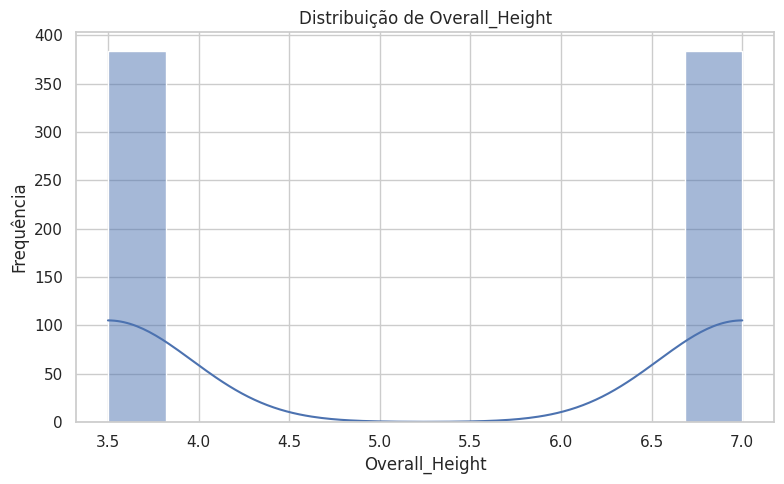

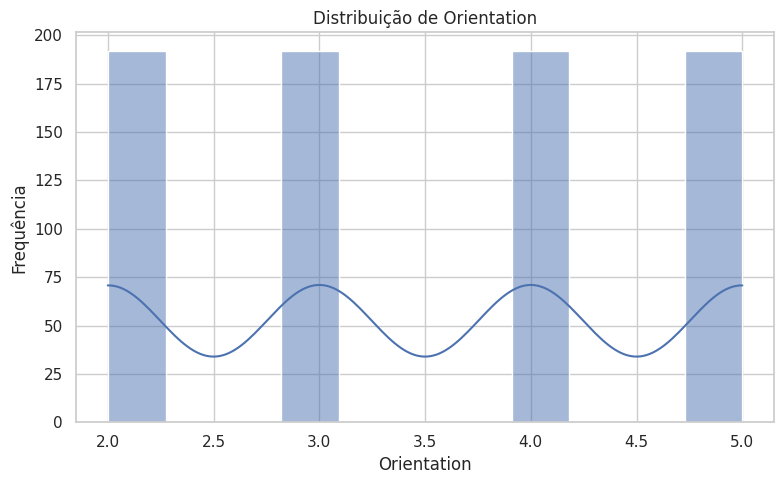

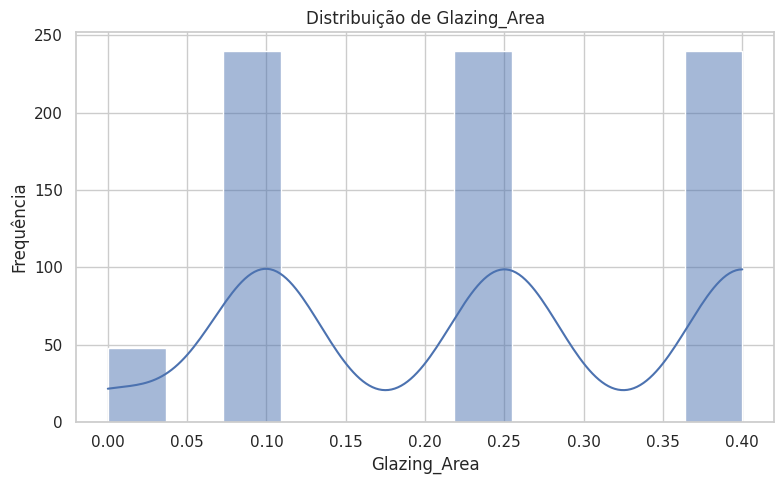

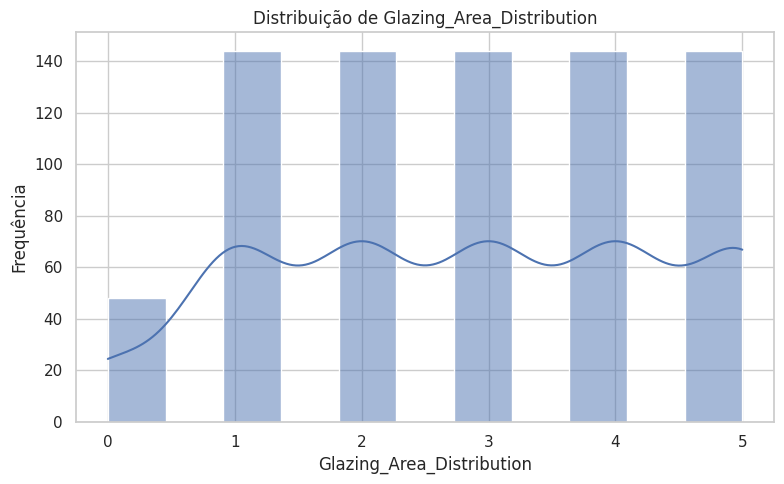

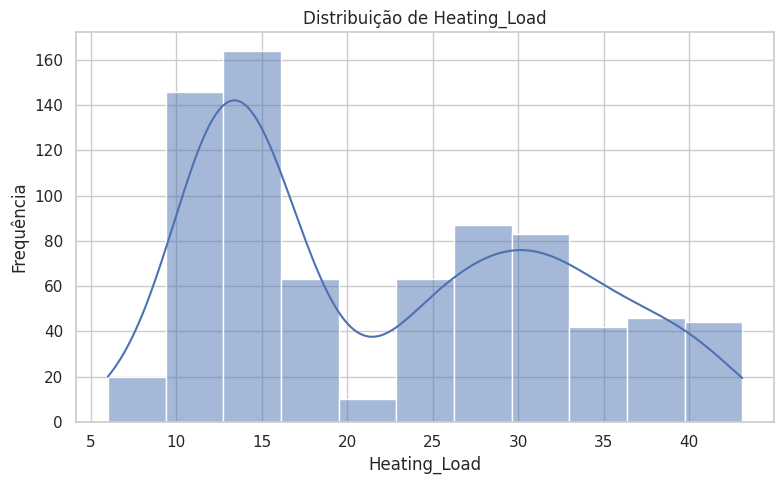

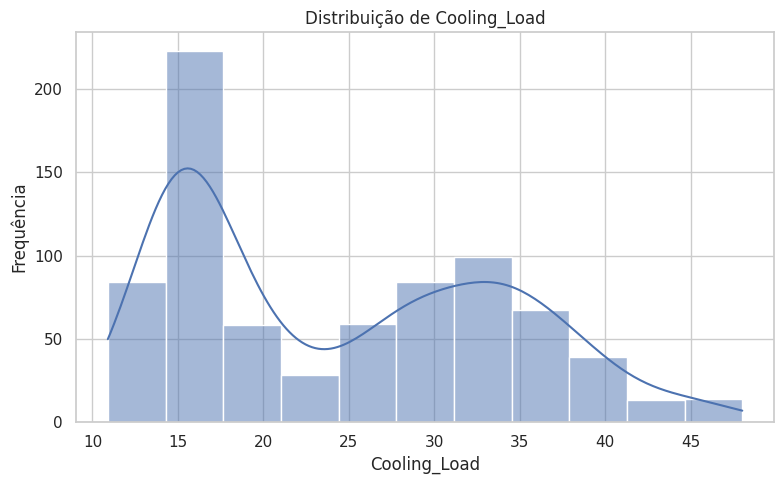

In [6]:
print("Plotando distribuições das variáveis numéricas:")

num_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in num_cols:
    plt.figure()
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribuição de {col}")
    plt.xlabel(col)
    plt.ylabel("Frequência")
    plt.tight_layout()
    plt.show()


5. MATRIZ DE CORRELAÇÃO

Calculando correlação entre variáveis...


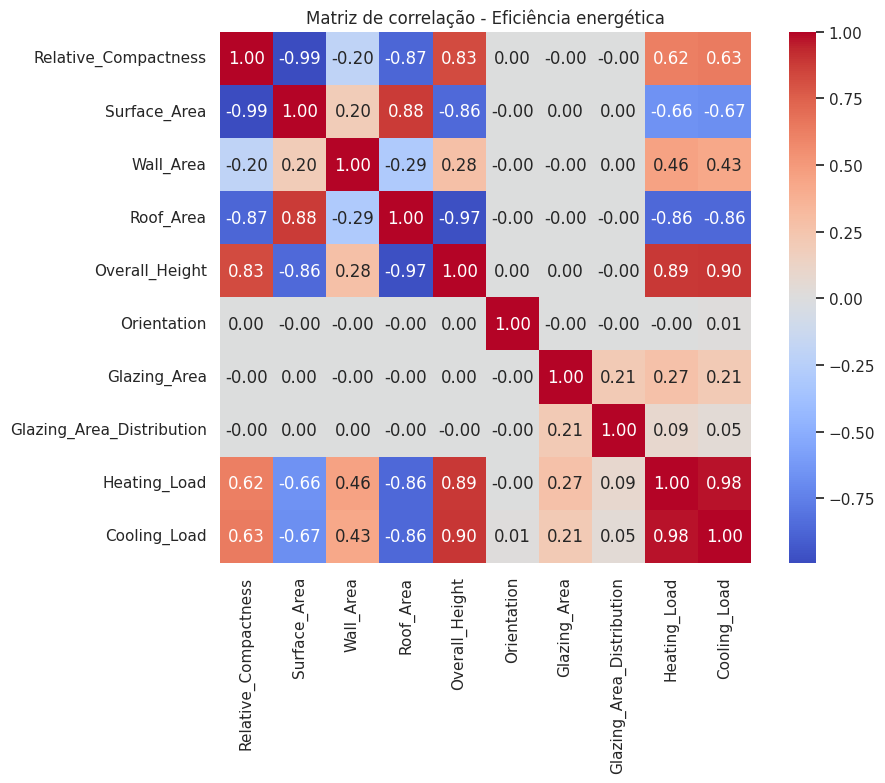


Principais correlações com a carga de resfriamento (Cooling_Load):
Cooling_Load                 1.000000
Heating_Load                 0.975862
Overall_Height               0.895785
Relative_Compactness         0.634339
Wall_Area                    0.427117
Glazing_Area                 0.207505
Glazing_Area_Distribution    0.050525
Orientation                  0.014290
Surface_Area                -0.672999
Roof_Area                   -0.862547
Name: Cooling_Load, dtype: float64


In [7]:
print("Calculando correlação entre variáveis...")

plt.figure(figsize=(10, 8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Matriz de correlação - Eficiência energética")
plt.tight_layout()
plt.show()

print("\nPrincipais correlações com a carga de resfriamento (Cooling_Load):")

# Aqui definimos diretamente a coluna alvo
target_col = 'Cooling_Load'

corr_target = corr[target_col].sort_values(ascending=False)
print(corr_target)


6. PREPARAR DADOS PARA MODELAGEM

In [8]:
print("Preparando dados para Regressão Linear (prever Cooling_Load)...")

# Usar todas as colunas numéricas exceto Heating_Load e a própria Cooling_Load
X = df.drop(columns=['Heating_Load', 'Cooling_Load'])
y = df['Cooling_Load']

print("Features usadas para treino:")
print(X.columns.tolist())

# Separar em treino e teste (80% / 20%)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"\nTamanho treino: {X_train.shape[0]} linhas")
print(f"Tamanho teste:  {X_test.shape[0]} linhas")

Preparando dados para Regressão Linear (prever Cooling_Load)...
Features usadas para treino:
['Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area', 'Overall_Height', 'Orientation', 'Glazing_Area', 'Glazing_Area_Distribution']

Tamanho treino: 614 linhas
Tamanho teste:  154 linhas


7. TREINAR MODELO DE REGRESSÃO LINEAR

In [9]:
print("Treinando modelo de Regressão Linear...")

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

print("✓ Modelo treinado!")

Treinando modelo de Regressão Linear...
✓ Modelo treinado!


8. AVALIAR O MODELO

In [10]:
print("Avaliando o modelo:")

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def avaliar_modelo(y_true, y_pred, conjunto=""):
    mae = mean_absolute_error(y_true, y_pred)

    # versão compatível com qualquer sklearn:
    mse = mean_squared_error(y_true, y_pred)   # sem o parâmetro 'squared'
    rmse = mse ** 0.5                          # raiz quadrada do MSE

    r2 = r2_score(y_true, y_pred)
    print(f"\nMétricas - {conjunto}")
    print(f"MAE : {mae:.3f}")
    print(f"RMSE: {rmse:.3f}")
    print(f"R²  : {r2:.3f}")

avaliar_modelo(y_train, y_pred_train, "Treino")
avaliar_modelo(y_test, y_pred_test, "Teste")


Avaliando o modelo:

Métricas - Treino
MAE : 2.253
RMSE: 3.198
R²  : 0.886

Métricas - Teste
MAE : 2.195
RMSE: 3.145
R²  : 0.893


9. GRÁFICO PREVISTO vs REAL (TESTE)

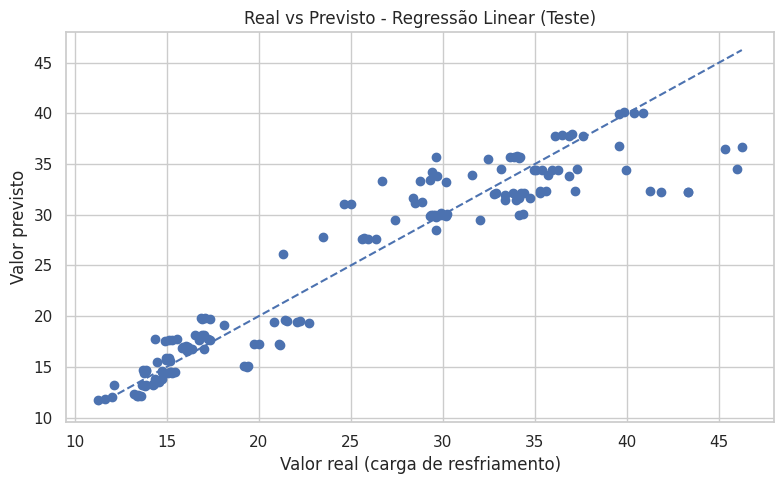

In [11]:
plt.figure()
plt.scatter(y_test, y_pred_test)
plt.xlabel("Valor real (carga de resfriamento)")
plt.ylabel("Valor previsto")
plt.title("Real vs Previsto - Regressão Linear (Teste)")
# Linha ideal (y = x)
min_val = min(y_test.min(), y_pred_test.min())
max_val = max(y_test.max(), y_pred_test.max())
plt.plot([min_val, max_val], [min_val, max_val], linestyle="--")
plt.tight_layout()
plt.show()


10. IMPORTÂNCIA DOS ATRIBUTOS (coeficientes)

In [12]:
print("Coeficientes do modelo (importância aproximada de cada variável):")
coef_df = pd.DataFrame({
    "feature": X.columns,
    "coeficiente": model.coef_
}).sort_values(by="coeficiente", ascending=False)

print(coef_df)

print("\nInterpretação básica:")
print("- Coeficientes positivos: aumentam a carga de resfriamento quando o valor da variável aumenta.")
print("- Coeficientes negativos: reduzem a carga de resfriamento quando o valor da variável aumenta.")
print("\nUse isso para discutir quais aspectos de projeto (área de vidro, altura, compacidade, etc.)")
print("tendem a tornar o prédio mais ou menos eficiente energeticamente.")

Coeficientes do modelo (importância aproximada de cada variável):
                     feature  coeficiente
6               Glazing_Area    14.787587
4             Overall_Height     4.046160
5                Orientation     0.055210
7  Glazing_Area_Distribution     0.033740
2                  Wall_Area     0.025423
3                  Roof_Area    -0.047322
1               Surface_Area    -0.069220
0       Relative_Compactness   -71.084528

Interpretação básica:
- Coeficientes positivos: aumentam a carga de resfriamento quando o valor da variável aumenta.
- Coeficientes negativos: reduzem a carga de resfriamento quando o valor da variável aumenta.

Use isso para discutir quais aspectos de projeto (área de vidro, altura, compacidade, etc.)
tendem a tornar o prédio mais ou menos eficiente energeticamente.
